In [ ]:
''' upload json file for linking data from kaggle to colab '''

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yasmeentrefi","key":"f14d234238cd171c7b086044ef9676c8"}'}

In [ ]:
'''Create folders for storing json file'''
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
'''downloading data'''
!kaggle datasets download -d yasmeentrefi/traincurrency

100% 3.27G/3.27G [00:57<00:00, 43.0MB/s]
100% 3.27G/3.27G [00:58<00:00, 60.5MB/s]


In [ ]:
!kaggle datasets download -d yasmeentrefi/validationcurency

 99% 768M/778M [00:13<00:00, 61.9MB/s]
100% 778M/778M [00:14<00:00, 58.2MB/s]


In [ ]:
'''extract data'''
import os
import zipfile

local_zip = '/content/traincurrency.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/content/validationcurency.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
''' 
Just to be sure how many pictures are in each class
Can be dispensable
'''

dir_100  = os.path.join('/tmp/TrainCurrency/100')
dir_1000 = os.path.join('/tmp/TrainCurrency/1000')
dir_200  = os.path.join('/tmp/TrainCurrency/200')
dir_2000 = os.path.join('/tmp/TrainCurrency/2000')
dir_50   = os.path.join('/tmp/TrainCurrency/50')
dir_500  = os.path.join('/tmp/TrainCurrency/500')
dir_5000  = os.path.join('/tmp/TrainCurrency/5000')

print('total training 100  images:', len(os.listdir(dir_100)))
print('total training 1000 images:', len(os.listdir(dir_1000)))
print('total training 200  images:', len(os.listdir(dir_200)))
print('total training 2000 images:', len(os.listdir(dir_2000)))
print('total training 50   images:', len(os.listdir(dir_50)))
print('total training 500  images:', len(os.listdir(dir_500)))
print('total training 5000 images:', len(os.listdir(dir_5000)))

files_100  = os.listdir(dir_100)
files_1000 = os.listdir(dir_1000)
files_200  = os.listdir(dir_200)
files_2000 = os.listdir(dir_2000)
files_50   = os.listdir(dir_50)
files_500  = os.listdir(dir_500)
files_5000 = os.listdir(dir_5000)

total training 100  images: 250
total training 1000 images: 250
total training 200  images: 250
total training 2000 images: 250
total training 50   images: 250
total training 500  images: 250
total training 5000 images: 250


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

#When we are optimistic that the accuracy will exceed 60 percent

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

''' 
Perform image processing as scaling , rotation and flip
While keeping the pictures in color, because we believe that colors may be useful to
distinguish between the different types of currencies
'''
TRAINING_DIR = "/tmp/TrainCurrency/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/valCurency"
validation_datagen = ImageDataGenerator(rescale = 1./255)

'''
Preparing generators for input to the model
'''
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=35
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=35
)

callbacks = myCallback()

#Moodle implementation

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The sixth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=50, validation_data = validation_generator, verbose = 1, validation_steps=10,callbacks=[callbacks])

model.save("currency.h5")

Found 1750 images belonging to 7 classes.
Found 350 images belonging to 7 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 64)        0         
_____________________________________

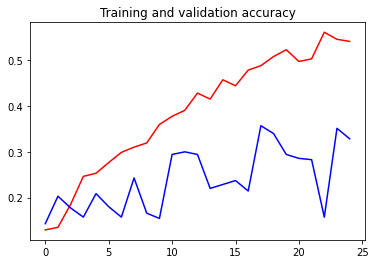

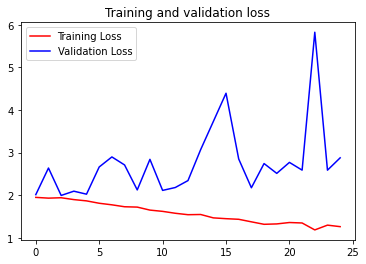

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()